In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
train = pd.read_csv("data-preCO-train.csv")
test = pd.read_csv("data-preCO-test.csv")
train.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO(GT)
0,0.523888,0.126156,0.184294,0.360514,0.108622,0.311024,0.328694,0.513040,0.454654,0.304153,0.509628,0.287117,1
1,0.474090,0.094197,0.145214,0.310850,0.065852,0.360796,0.266509,0.453125,0.326382,0.297419,0.494544,0.270951,0
2,0.554759,0.074012,0.138933,0.302367,0.084861,0.346500,0.331655,0.451214,0.370588,0.265993,0.575096,0.283352,1
3,0.535281,0.067283,0.142566,0.307292,0.112695,0.326168,0.355345,0.464366,0.426741,0.245791,0.652439,0.301626,1
4,0.459390,0.042893,0.099931,0.245588,0.084861,0.374034,0.337578,0.422212,0.386228,0.249158,0.646983,0.302669,0


In [53]:
target = train["CO(GT)"]
train.drop(["CO(GT)"], axis=1, inplace=True)

###### 先使用简单交叉验证， 之后会用K折交叉验证重新测试

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42, shuffle=True)

In [7]:
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)

Unique labels in y_train: [0 1]


In [62]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
# model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=300, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/300


C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6020 - loss: 0.6662 - val_accuracy: 0.8915 - val_loss: 0.5477
Epoch 2/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.4727 - val_accuracy: 0.9055 - val_loss: 0.2912
Epoch 3/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.2634 - val_accuracy: 0.9181 - val_loss: 0.2206
Epoch 4/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9128 - loss: 0.2267 - val_accuracy: 0.9269 - val_loss: 0.2050
Epoch 5/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9239 - loss: 0.2106 - val_accuracy: 0.9269 - val_loss: 0.1982
Epoch 6/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.2001 - val_accuracy: 0.9292 - val_loss: 0.1934
Epoch 7/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.2015 - val_accuracy: 0.9277 - val_loss: 0.1905
Epoch 8/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9233 - loss: 0.1991 - val_accuracy: 0.9321 - val_loss: 0.1

In [9]:
import matplotlib.pyplot as plt

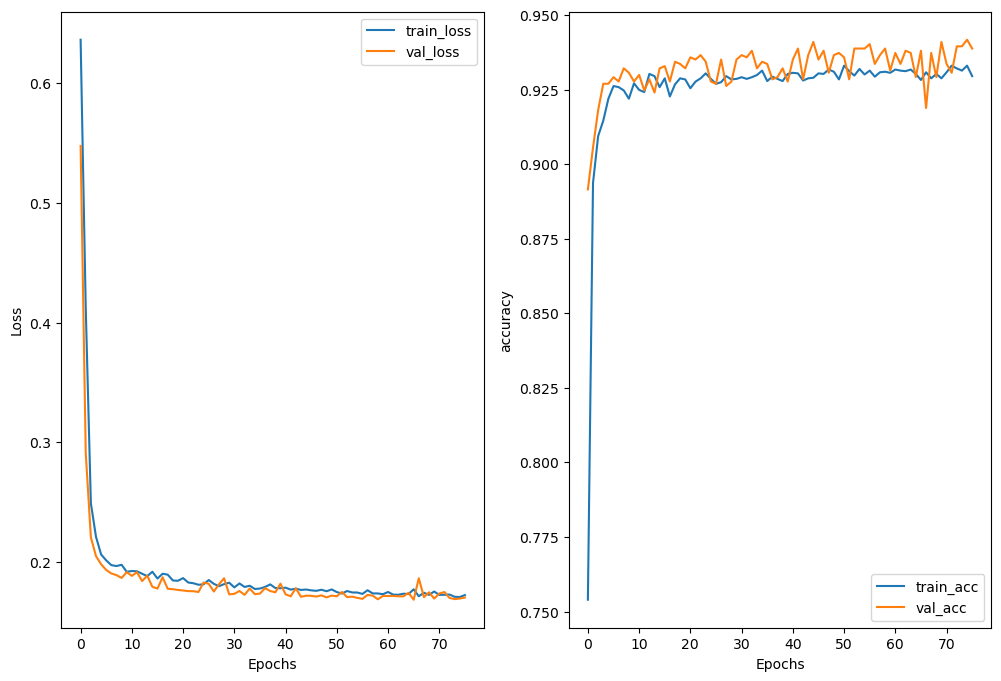

In [63]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###### 我们可以看到，在我们的疯狂炼丹下， 准确率只达到了90%, 坏消息是无论是增加层数还是隐藏节点都不会提高准确率，但是目前并没有发生过拟合.
###### 说明此时训练模型遇到瓶颈，需要对数据进行新的变化，记下来我们将对数据进行多项式变换

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [65]:
X = pd.read_csv("data-preCO-train.csv")
y = X["CO(GT)"]
X.drop(["CO(GT)"], axis=1, inplace=True)

In [17]:
X.shape, y.shape

((6773, 12), (6773,))

In [66]:
poly_X = poly.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42, shuffle=True)

In [20]:
X_train.shape, y_train.shape

((5418, 91), (5418,))

In [87]:
model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(poly_X.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', input_shape=(poly_X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))
# model.add(Dense(8, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(poly_X, target, epochs=500, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6700 - loss: 0.6050 - val_accuracy: 0.9100 - val_loss: 0.2288
Epoch 2/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9137 - loss: 0.2430 - val_accuracy: 0.9247 - val_loss: 0.1959
Epoch 3/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9143 - loss: 0.2430 - val_accuracy: 0.9277 - val_loss: 0.1900
Epoch 4/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9234 - loss: 0.2228 - val_accuracy: 0.9314 - val_loss: 0.1837
Epoch 5/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9256 - loss: 0.2064 - val_accuracy: 0.9328 - val_loss: 0.1784
Epoch 6/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9245 - loss: 0.2059 - val_accuracy: 0.9321 - val_loss: 0.1771
Epoch 7/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9255 - loss: 0.2142 - val_accuracy: 0.9358 - val_loss: 0.1767
Epoch 8/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.2086 - val_accuracy: 0.9336 - v

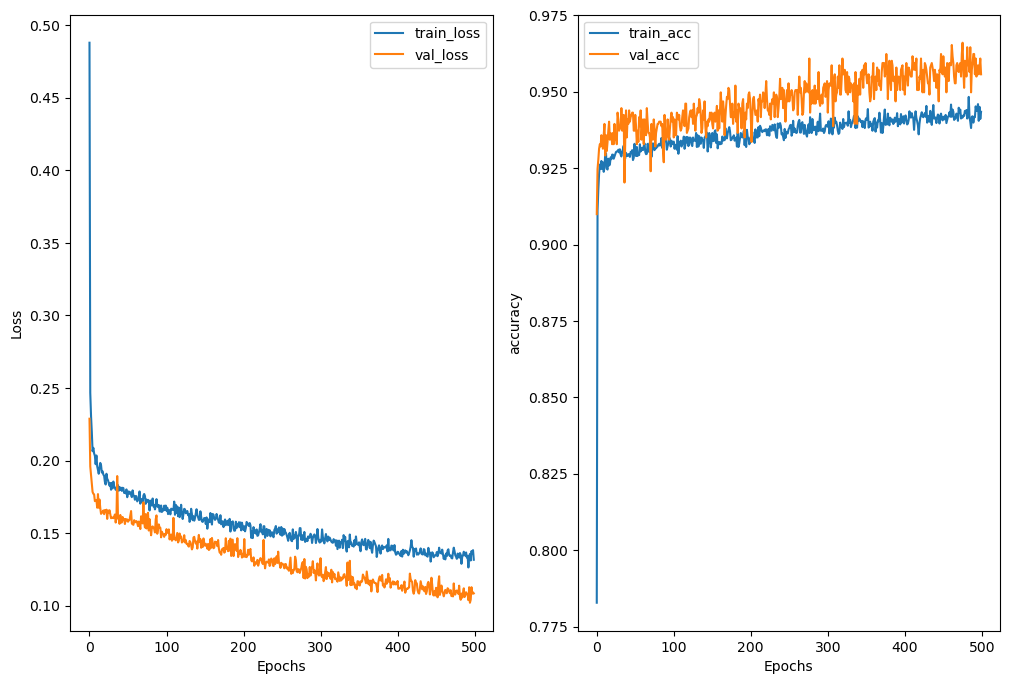

In [88]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [89]:
predict = (model.predict(X_test) > 0.5).astype('int')
accuracy_score(y_test.values, predict)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.955719557195572

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

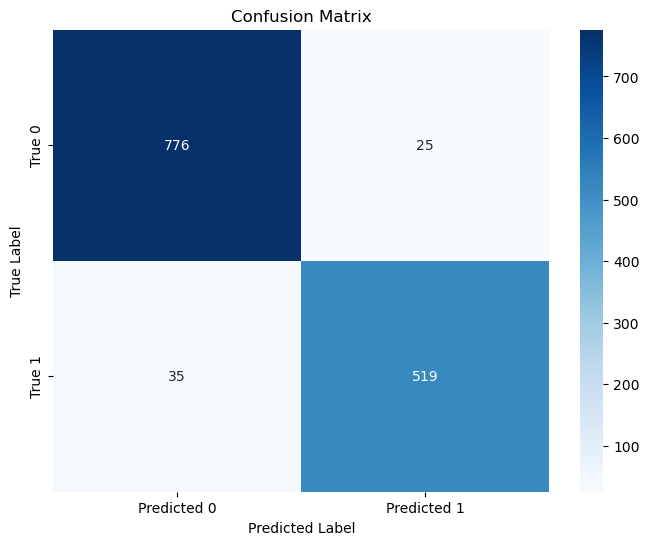

In [90]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [91]:
model.save("regression_model.h5")